# Comp 5130 Project

# K-Means Clustering

## Authors: Kevin Dong, Maci Hadley, Marshall Nelson

### Dr. Yang Zhou


#### Imports

In [7]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as random



ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

#### Load Dataset  
We are using the simple circles dataset from UCIrvine

In [8]:
 # Define the file to open
file_path = 'circles.txt'

# Open the file and read coordinates
coordinates = np.loadtxt(file_path, delimiter=',', skiprows=1, usecols=(0, 1))

# Print out the list of coordinates
# print("Points:", coordinates)

#### Define K-Means Clustering Function
Self-Implemented without using an external k-means library


In [9]:
def initialize_centroids(data, k):
    indices = np.random.choice(len(data), k, replace=False)
    centroids = np.array(data[indices])
    return centroids

def assign_clusters(data, centroids):
    # Assign each point to the nearest centroid
    clusters = []
    for point in data:
        distances = np.linalg.norm(point - centroids, axis=1)
        nearest_centroid = np.argmin(distances)
        clusters.append(nearest_centroid)
    return np.array(clusters)

def update_centroids(data, clusters, k):
    # Calculate new centroids as the mean of assigned points
    new_centroids = []
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            new_centroids.append(cluster_points.mean(axis=0))
        else:
            # If a cluster has no points, reinitialize its centroid randomly
            new_centroids.append(data[np.random.choice(len(data))])
    return np.array(new_centroids)

        
            

#### Perform K-Means on the dataset  

In [10]:
def kmeans(data, k, max_iters=100, tol=1e-4):
    # Initialize centroids
    centroids = initialize_centroids(data, k)
    for i in range(max_iters):
        # Assign clusters
        clusters = assign_clusters(data, centroids)
        # Update centroids
        new_centroids = update_centroids(data, clusters, k)
        # Check for convergence
        if np.all(np.abs(new_centroids - centroids) < tol):
            print(f"Converged after {i+1} iterations.")
            break
        centroids = new_centroids
    return clusters, centroids

In [11]:
k = 100
clusters, centroids = kmeans(coordinates, k)
print(centroids)
print(clusters)

Converged after 23 iterations.
[[ 1.79819700e+02  6.69873400e-01]
 [ 3.96761900e+01  7.96235782e+01]
 [ 1.99478279e+01  3.44727300e-01]
 [ 2.00316882e+01  1.76873987e+02]
 [ 6.04890988e+01  4.00367101e+01]
 [ 7.64212816e+01  1.82726742e+00]
 [ 1.00434041e+02  1.04444998e+02]
 [ 6.00494321e+01  1.98344564e+01]
 [ 1.79661183e+02  1.46124224e+02]
 [ 1.23530376e+01  1.95087450e+01]
 [-1.64965929e+00  6.38578886e+01]
 [ 1.98547705e+01  1.39999339e+02]
 [ 8.42557639e+01  1.20458894e+02]
 [ 8.00875341e+01  9.70636930e+01]
 [ 1.79774606e+02  2.42342697e+01]
 [ 1.18492082e+02  4.30750792e+01]
 [ 3.23000000e-03  1.79709410e+02]
 [ 2.01525273e+01  1.83284988e+02]
 [ 4.02863707e+01  5.94251483e+01]
 [ 1.39648766e+02  1.56546539e+02]
 [ 6.01209191e+01  6.03748878e+01]
 [ 1.60299820e+02  2.36230157e+01]
 [-1.66649000e-01  1.39901100e-01]
 [ 9.65503796e+01  1.90606988e+01]
 [ 4.04595714e+01  9.99861359e+01]
 [ 6.00622637e+01  9.98856828e+01]
 [ 1.19664981e+02  7.99311472e+01]
 [ 1.02964813e+02  2.099

/var/folders/35/fg4z6rgn72l398bjvn1s4pcr0000gn/T/ipykernel_2514/1924449500.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", k)


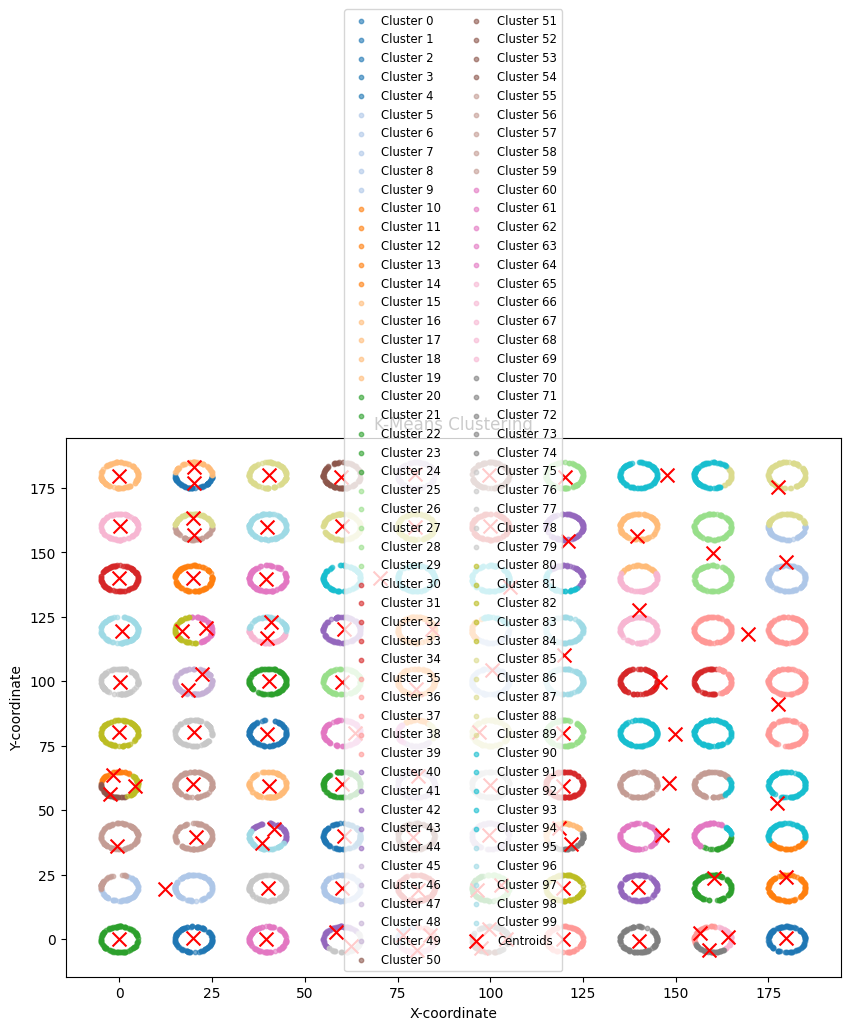

In [12]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def plot_clusters(data, clusters, centroids, k):
    plt.figure(figsize=(10, 7))

    # Assign unique colors to clusters
    colors = plt.cm.get_cmap("tab20", k)

    # Plot each cluster
    for cluster_id in range(k):
        cluster_points = data[clusters == cluster_id]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                    s=10, color=colors(cluster_id), label=f'Cluster {cluster_id}', alpha=0.6)

    # Plot the centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], 
                s=100, color='red', marker='x', label='Centroids')

    # Add labels and legend
    plt.title("K-Means Clustering")
    plt.xlabel("X-coordinate")
    plt.ylabel("Y-coordinate")
    plt.legend(fontsize='small', loc='best', ncol=2)
    plt.show()

clusters = np.array(clusters)

plot_clusters(coordinates, clusters, centroids, k)

